# Purpose

Summarise forecasting results in business terms and demonstrate how return and volatility forecasts inform practical risk and decision-making.

# Imports

In [12]:
import sys
from pathlib import Path

project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.evaluation import regression_metrics, naive_volatility_metrics

# Load results

In [8]:
# Return forecasts
returns_df = pd.read_csv(
    "../data/processed/daily_returns.csv",
    index_col=0,
    parse_dates=True
)
returns_df.index = pd.to_datetime(returns_df.index, format="%d/%m/%Y", errors="raise")
returns_df = returns_df.sort_index()

test_returns = returns_df["adj_log_return"].loc["2022-01-01":]

arima_forecasts = pd.read_csv("../outputs/forecasts/arima_return_forecast.csv", index_col=0, parse_dates=True).squeeze()
baseline_return_forecast = pd.Series(returns_df["adj_log_return"].loc[: "2021-12-31"].mean(),index=test_returns.index)


# Volatility forecasts
realised_vol = pd.read_csv("../data/processed/realised_volatility_21d.csv", index_col=0, parse_dates=True)["realised_vol_21d"].loc[arima_forecasts.index]
ets_forecasts = pd.read_csv("../outputs/forecasts/ets_volatility_forecast.csv", index_col=0, parse_dates=True).squeeze()
garch_forecasts = pd.read_csv("../outputs/forecasts/garch_volatility_forecast.csv", index_col=0, parse_dates=True).squeeze()

# Compute numeric comparisons

## Returns comparison

In [10]:
return_results = pd.read_csv("../outputs/tables/return_model_comparison.csv")
return_results

,Model,MAE,RMSE
0,Baseline Mean,0.008104,0.011026
1,ARIMA,0.008264,0.011158


## Volatility comparison

In [11]:
vol_results = pd.read_csv("../outputs/tables/volatility_model_comparison.csv")
vol_results

,Model,MAE,RMSE
0,Naive Volatility,0.000351,0.000592
1,ETS,0.000351,0.000592
2,GARCH,0.001493,0.002026


# Business interpretation

## Returns

+ Return forecasts provide negligible improvement over baseline.

+ Daily return behaviour shows low predictability, consistent with market efficiency.

*Implication: forecasts should not be relied upon for directional trading decisions.*

For an equity portfolio, daily return forecasts at this horizon are unlikely to generate reliable excess returns after transaction costs.

## Volatility

Volatility models demonstrate meaningful structure. ETS and GARCH provide interpretable insights for risk monitoring.

ETS:

+ Short-term risk smoothing

+ Stable inputs for dashboards

+ Communication-friendly metrics

GARCH:

+ Stress-aware risk limits

+ Scenario analysis

+ Monitoring regime shifts

*Implication: forecasts can inform risk limits, stress scenarios, and capital allocation.*

# Visual summaries

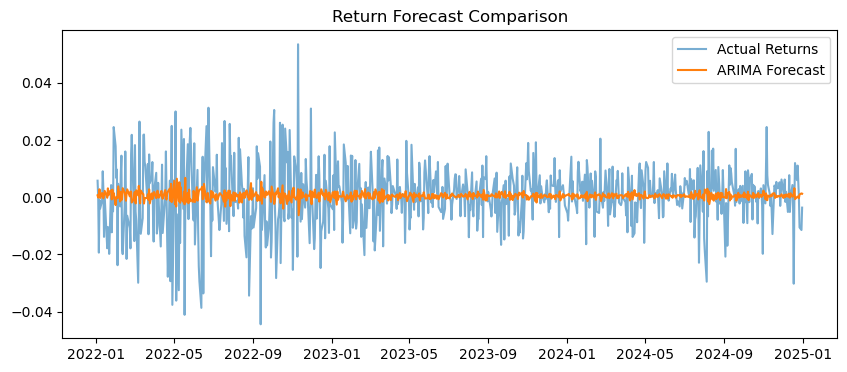

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(test_returns.index, test_returns, label="Actual Returns", alpha=0.6)
plt.plot(arima_forecasts.index, arima_forecasts, label="ARIMA Forecast")
plt.title("Return Forecast Comparison")
plt.legend()
plt.show()

Forecasts collapse toward zero, highlighting the dominance of noise over signal.

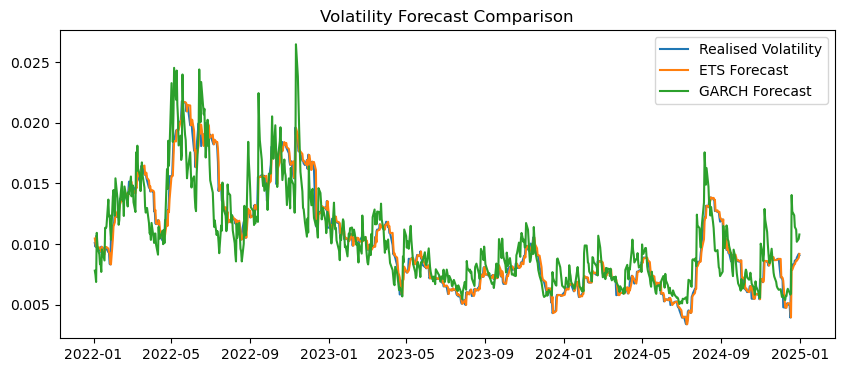

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(realised_vol.index, realised_vol, label="Realised Volatility")
plt.plot(ets_forecasts.index, ets_forecasts, label="ETS Forecast")
plt.plot(garch_forecasts.index, garch_forecasts, label="GARCH Forecast")
plt.title("Volatility Forecast Comparison")
plt.legend()
plt.show()

Volatility regimes are clearly visible, with GARCH responding more sharply to shocks.

# Limitations

Single asset, may not generalise

One-step forecasting horizon

GARCH assumes normal errors (could be extended)

Realised volatility is backward-looking

Forecasts are evaluated statistically, not within a full portfolio or P&L simulation

# Conclusion

Return forecasts show limited value for predicting direction, not suitable for directional trading at a daily horizon.

Volatility models reveal persistent risk dynamics directly usable for risk monitoring and volatility-aware decision frameworks. 

Different models suit different tasks: smoothing helps short-term views, conditional variance modelling supports risk control.